<span style='color: brown; font-size: 25px'> Investment Strategy - A long-term approach </span>

<span style='color: black; font-size: 16px'>
> API used: Yahoo finance <br>
> Currency in rands at the current exchange rate. </span>

---

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# Downloading historical data for VOO
stock_symbol = "VOO"
start_date = "2010-01-01"
end_date = "2023-12-31"
df = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-09-09,102.500000,102.500000,101.139999,101.320000,78.490952,26500
2010-09-10,101.680000,101.860001,101.300003,101.779999,78.847298,8600
2010-09-13,102.959999,103.139999,102.500000,103.059998,79.838875,33750
2010-09-14,102.839996,103.480003,102.379997,103.040001,79.823387,59400
2010-09-15,102.620003,103.379997,102.400002,103.300003,80.024834,9250


In [4]:
df.shape

(3350, 6)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,435.459991,436.839996,433.480011,435.290009,433.894684,4035200
2023-12-26,435.670013,437.920013,435.579987,437.100006,435.698853,3835800
2023-12-27,436.899994,438.019989,436.420013,437.899994,436.496277,4271000
2023-12-28,438.250000,438.839996,437.660004,437.970001,436.566071,4703700
2023-12-29,437.869995,438.339996,434.940002,436.799988,435.399811,4374400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3350 entries, 2010-09-09 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3350 non-null   float64
 1   High       3350 non-null   float64
 2   Low        3350 non-null   float64
 3   Close      3350 non-null   float64
 4   Adj Close  3350 non-null   float64
 5   Volume     3350 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 183.2 KB


In [7]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.duplicated().sum()

0

<span style='font-size:16px'>Data is clean<span>

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3350.000000,3350.000000,3350.000000,3350.000000,3350.000000,3.350000e+03
mean,239.197439,240.444606,237.824212,239.231137,217.869386,2.567053e+06
std,96.059177,96.664223,95.420203,96.079731,101.684292,2.360912e+06
min,99.139999,101.860001,98.239998,100.339996,78.490952,8.600000e+03
25%,166.047501,166.509995,165.590004,166.279995,137.908627,9.537875e+05
50%,219.080002,219.625000,218.264999,219.004997,193.956841,2.083250e+06
75%,309.217491,310.687500,307.109993,309.237495,290.902580,3.464750e+06
max,440.579987,441.260010,437.660004,439.250000,436.566071,2.466930e+07


---

<span style='font-size:25px; color:brown'>Linear Regression</span><br>
<span style='font-size:16px'> Compound Interest at retirement <span>

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


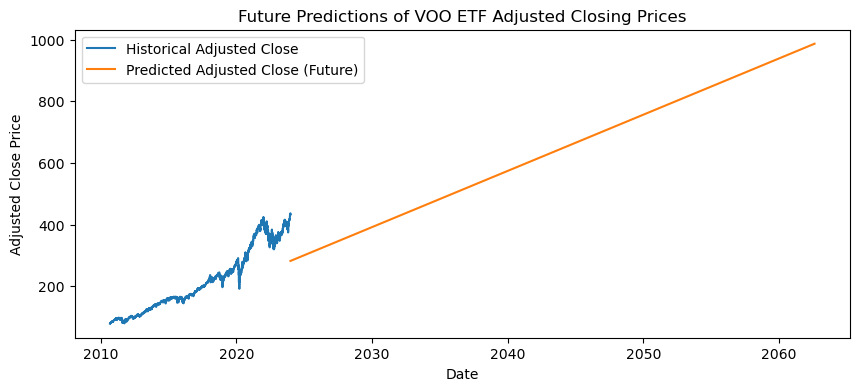

In [32]:
# Extracting adjusted closing prices and reseting index
df = df[['Adj Close']].reset_index()
df['Date'] = pd.to_datetime(df['Date']) 
df.set_index('Date', inplace=True)  

# number of days since the start date
df['Days'] = (df.index - df.index.min()).days

# linear regression 
X = df[['Days']]           # Independent variable: Number of days since start date
y = df['Adj Close']        # Dependent variable: Adjusted closing prices

model = LinearRegression()
model.fit(X, y)

# Generating future dates and predicting VOO prices for the next 40 years
last_date = df.index.max()
future_dates = pd.date_range(start=last_date, periods=40*252, freq='B')  # 'B' stands for business days
future_days = np.arange(len(df), len(df) + len(future_dates))
future_days = future_days.reshape(-1, 1)  # Reshape for model prediction

future_prices = model.predict(future_days)
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Adj Close': future_prices})
future_df.set_index('Date', inplace=True) 

# Visualizion of historical and predicted VOO prices
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Adj Close'], label='Historical Adjusted Close')
plt.plot(future_df.index, future_df['Predicted Adj Close'], label='Predicted Adjusted Close (Future)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Future Predictions of VOO ETF Adjusted Closing Prices')
plt.legend()
plt.show()

---

<span style='font-size:25px; color:brown'>Return on Investment (ROI)</span>

In [38]:
# expected ROI after 40 years
initial_investment = 90000
current_price = df['Adj Close'].iloc[-1]  # based on the last available historical data
final_price = future_df['Predicted Adj Close'].iloc[-1]

capital_appreciation = final_price - current_price
dividend_yield = 5.81  # pays 1.35% every 3 months
dividend_income = initial_investment * dividend_yield * (40 / 252)  # dividends will be reinvested quarterly

total_investment_value = initial_investment + capital_appreciation + dividend_income
roi_percentage = ((total_investment_value - initial_investment) / initial_investment) * 100

# Investment analysis results
print("Initial Investment: R", initial_investment)
print("Current Price: R", current_price)
print("Predicted Final Price (40 years later): R", final_price)
print("Expected Capital Appreciation: R", capital_appreciation)
print("Expected Dividend Income: R", dividend_income)
print("Total Investment Value (40 years later): R", total_investment_value)
print("Expected Return on Investment (ROI): {:.2f}%".format(roi_percentage))

Initial Investment: R 90000
Current Price: R 435.3998107910156
Predicted Final Price (40 years later): R 986.8395412025685
Expected Capital Appreciation: R 551.4397304115529
Expected Dividend Income: R 82999.99999999999
Total Investment Value (40 years later): R 173551.43973041154
Expected Return on Investment (ROI): 92.83%


Shape of simulated_prices array: (1000, 10080)


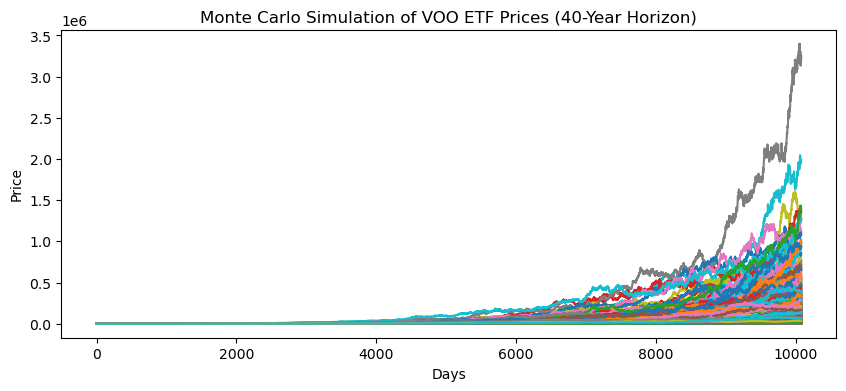

In 40 years:
Mean Price: 144473.25707191348
Median Price: 78316.14325142905
10th Percentile Price: 18588.407695155438
90th Percentile Price: 311012.24309388245


In [33]:
# Select adjusted closing prices
prices = df['Adj Close']
# Calculate daily returns
returns = prices.pct_change().dropna()
# Calculate mean and standard deviation of daily returns
mean_return = returns.mean()
std_dev = returns.std()
import numpy as np

# Define parameters for Monte Carlo simulation
num_simulations = 1000  # Number of simulations
num_days = 40 * 252  # Number of trading days in 40 years

# Initialize an array to store simulated prices
simulated_prices = np.zeros((num_simulations, num_days))

# Perform Monte Carlo simulation
for i in range(num_simulations):
    # Generate random daily returns based on normal distribution
    daily_returns = np.random.normal(mean_return, std_dev, num_days)
    
    # Calculate simulated prices
    simulated_prices[i, :] = np.cumprod(1 + daily_returns) * prices.iloc[-1]

# Display the shape of simulated_prices array
print("Shape of simulated_prices array:", simulated_prices.shape)

# Plot Monte Carlo simulation results
plt.figure(figsize=(10, 4))
for i in range(num_simulations):
    plt.plot(simulated_prices[i, :])

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Simulation of VOO ETF Prices (40-Year Horizon)')
plt.show()

# Calculate and display summary statistics of simulated prices
final_prices = simulated_prices[:, -1]
mean_price = np.mean(final_prices)
median_price = np.median(final_prices)
percentile_10 = np.percentile(final_prices, 10)
percentile_90 = np.percentile(final_prices, 90)

print("In 40 years:")
print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("10th Percentile Price:", percentile_10)
print("90th Percentile Price:", percentile_90)


---

<span style='color:brown; font-size:25px'>How are other indexes doing:</span>

[*********************100%%**********************]  5 of 5 completed


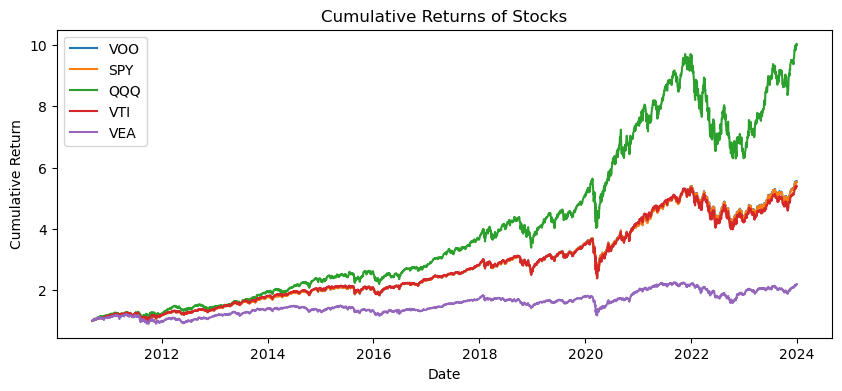

Annualized Returns:
Ticker
QQQ    0.194425
SPY    0.143453
VEA    0.076261
VOO    0.143995
VTI    0.142259
dtype: float64

Annualized Volatility:
Ticker
QQQ    0.205553
SPY    0.171768
VEA    0.183749
VOO    0.173136
VTI    0.175978
dtype: float64


In [35]:
# Define a list of ETF tickers for comparison
etf_tickers = ['VOO', 'SPY', 'QQQ', 'VTI', 'VEA']

# Download historical data for ETFs
etf_data = yf.download(etf_tickers, start='2010-01-01', end='2024-01-01')

# Selecting adjusted closing prices for comparison
etf_prices = etf_data['Adj Close']

# Daily returns for each ETF
etf_returns = etf_prices.pct_change().dropna()

# Cumulative returns over the entire period
cumulative_returns = (1 + etf_returns).cumprod()

# Calculate annualized returns and volatility (standard deviation of returns)
annualized_returns = etf_returns.mean() * 252  # Assuming 252 trading days per year
annualized_volatility = etf_returns.std() * np.sqrt(252)

# Plot cumulative returns of ETFs
plt.figure(figsize=(10, 4))
for ticker in etf_tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Stocks')
plt.legend()
plt.show()

# Display annualized returns and volatility for each ETF
print("Annualized Returns:")
print(annualized_returns)

print("\nAnnualized Volatility:")
print(annualized_volatility)
